# Environment

In [1]:
import torchaudio
from IPython.display import Audio
from helpers.path_utils import get_base_dir
from helpers.transform import apply_bandpass_filter
from helpers.plot import plot_wavelet_spectrogram, plot_audio_fft

# Heartbeat from mobile recording

Sample rate:  16000


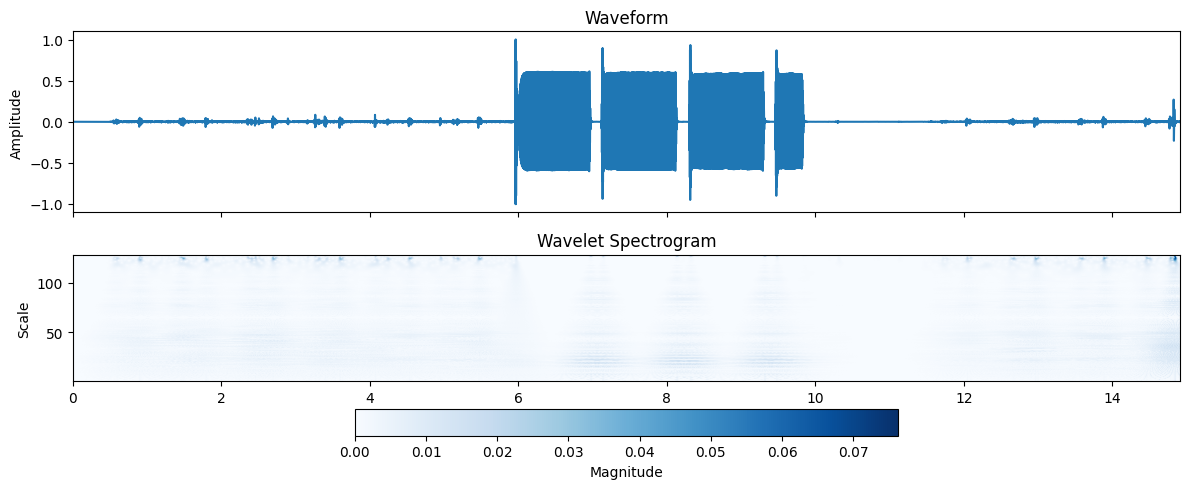

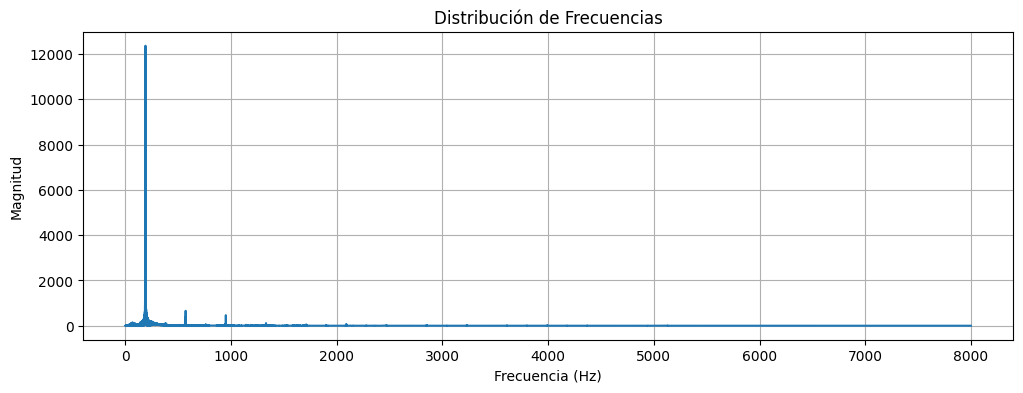

In [2]:
AUDIO_NAME = "test-trigger.m4a"
DIGITAL_AUDIO_DIR = get_base_dir().joinpath(f"data/mobile/{AUDIO_NAME}")

digital_audio, digital_sample_rate = torchaudio.load(str(DIGITAL_AUDIO_DIR))
print("Sample rate: ", digital_sample_rate)

plot_wavelet_spectrogram(digital_audio.numpy(), digital_sample_rate)
plot_audio_fft(digital_audio.numpy(), digital_sample_rate)

Audio(digital_audio, rate=digital_sample_rate, autoplay=True)

# Focus on synthetic frequency

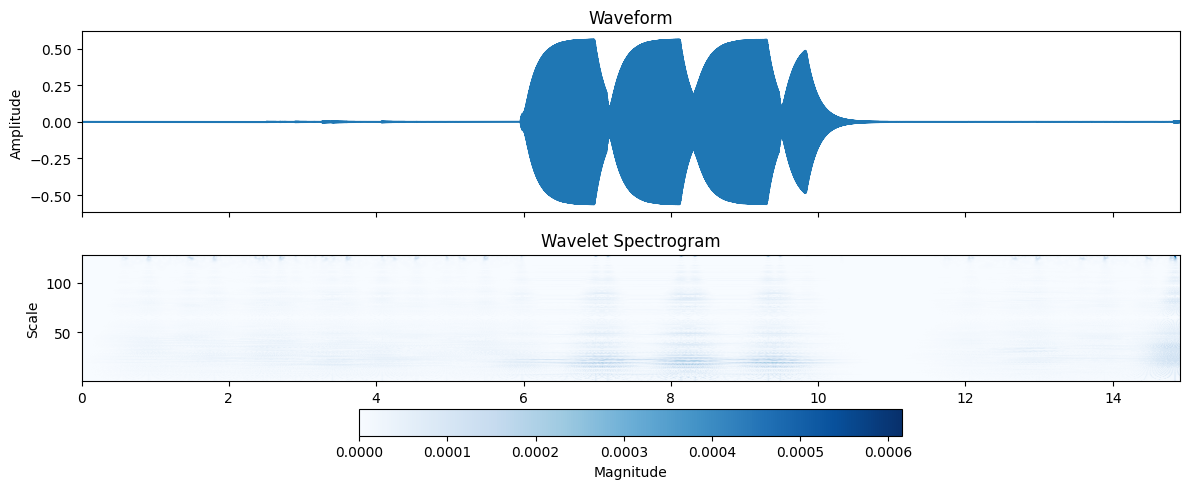

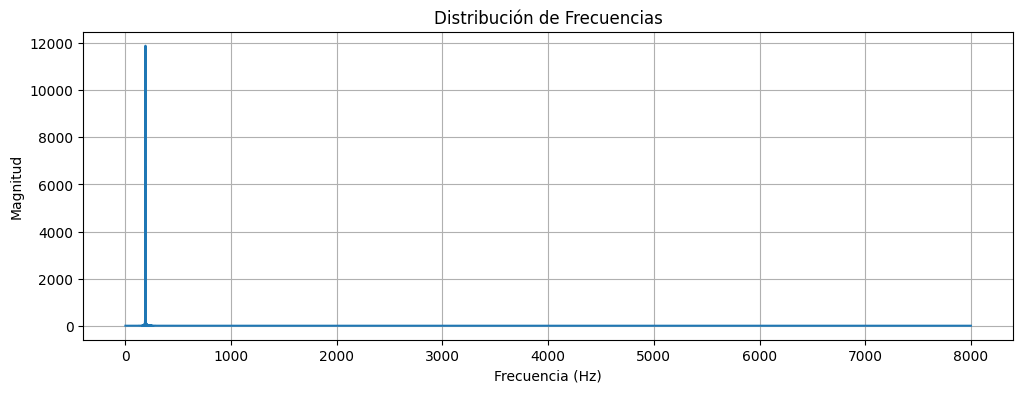

In [3]:
low_cutoff = 189
high_cutoff = 191

filtered_audio = apply_bandpass_filter(
    digital_audio, digital_sample_rate, low_cutoff, high_cutoff
)

plot_wavelet_spectrogram(filtered_audio.numpy(), digital_sample_rate)
plot_audio_fft(filtered_audio.numpy(), digital_sample_rate)

Audio(filtered_audio, rate=digital_sample_rate, autoplay=True)

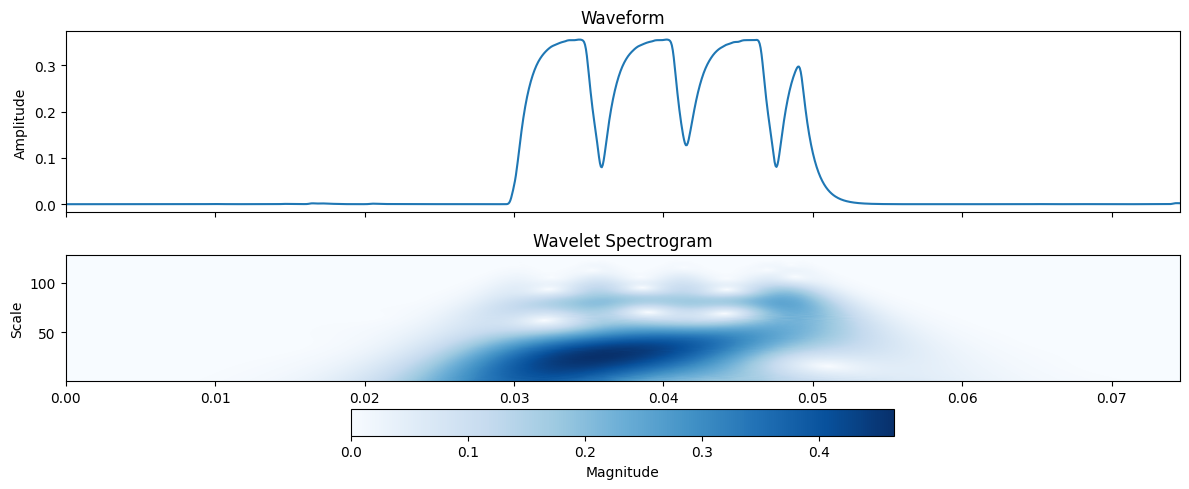

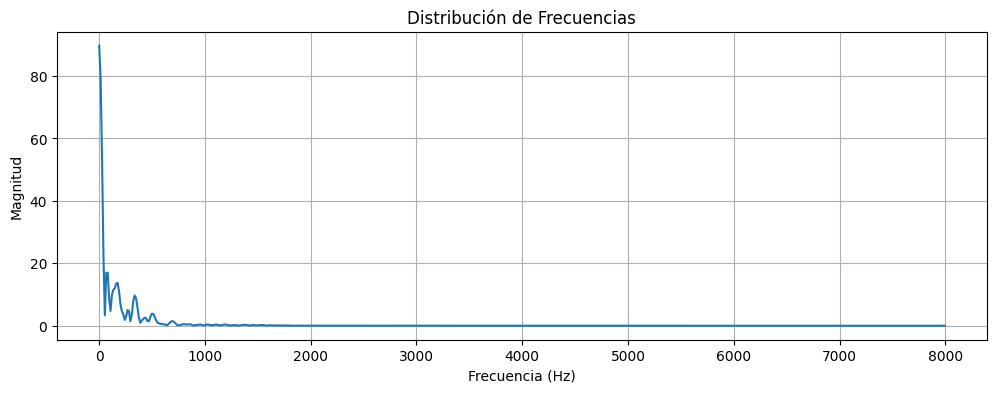

In [4]:
from helpers.transform import TrimAfterClicker

tac = TrimAfterClicker()

smoothed = tac.abs_downsample_smooth(filtered_audio, downsample_factor=200, sigma=2)
plot_wavelet_spectrogram(smoothed, digital_sample_rate, downsample_factor=1)
plot_audio_fft(smoothed, digital_sample_rate)

Audio(smoothed, rate=digital_sample_rate/200, autoplay=True)

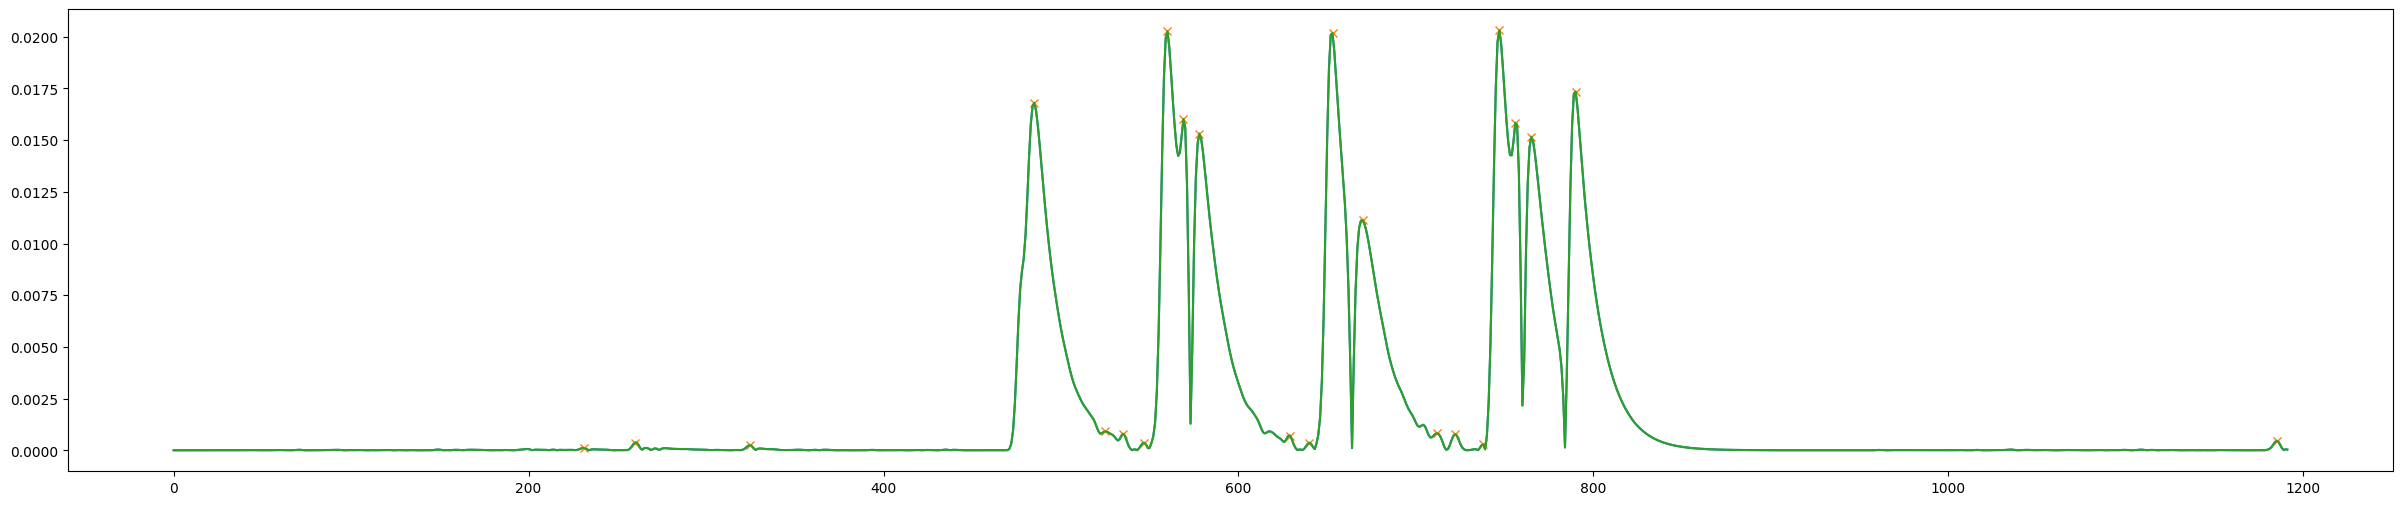

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

smoothed_diff = np.abs(np.diff(smoothed).squeeze())
peaks, _ = find_peaks(smoothed_diff, prominence=0.0001)

plt.figure(figsize=(30, 6))
plt.plot(smoothed_diff)
plt.plot(peaks, smoothed_diff[peaks], "x")

plt.plot(smoothed_diff)



Siguientes pasos:
- De la onda con el pasabandas +-1 en 190Hz pasarle el método TrimAfterClicker.abs_downsample_smooth(...) (renombrar a TrimAfterTrigger 😏). Cómo asegurar un downsample_factor fijo? Relacionado al sample_rate?
- Aplicar np.diff para encontrar cambios en la curva
- Absoluto porque el último cambio es negativo
- Escalar de 0 a 1?
- scipy.signal.find_peaks(...). Con qué parámetros?
- Identificar el último pico + un cachito adicional (ligado al sample_rate considerando el donwsample del inicio)
- Obtener ese punto en el audio original (upsample)
- Cortar el audio original a partir del final del último trigger